In [15]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler

Load the dataset and make your preprocessing like normalizing the data.

In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices]/255
y = mnist.target[indices]


In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


Apply UMAP to the data and get the first two principal components.


In [39]:
umapdata =  umap.UMAP(n_neighbors=6,
                      min_dist=.8,
                      metric='correlation').fit_transform(X_std)

Using the first two principal components, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.


In [40]:
import random
c = []
for i in range(len(np.unique(y))):
    r = random.random()
    g = random.random()
    b = random.random()
    color = (r,g,b)
    c.append(color)
c

[(0.7821675720170879, 0.9102213826354375, 0.23029337837503716),
 (0.04123114491279822, 0.474535527618388, 0.9025600981027144),
 (0.9814993574070509, 0.6669652546200541, 0.5373334069083386),
 (0.1113994423006679, 0.7790118524747485, 0.8478282555694024),
 (0.731021433402304, 0.6784664190523565, 0.8098278734842158),
 (0.5461740024905785, 0.6970398394604771, 0.4005287217543845),
 (0.7677970821900756, 0.17564127895751425, 0.11046784363998974),
 (0.04458411036765397, 0.922673010909265, 0.46000614578757837),
 (0.8137856564656355, 0.8770220803819444, 0.08687304695721898),
 (0.08638505780390915, 0.8066076166640855, 0.7243482268841418)]

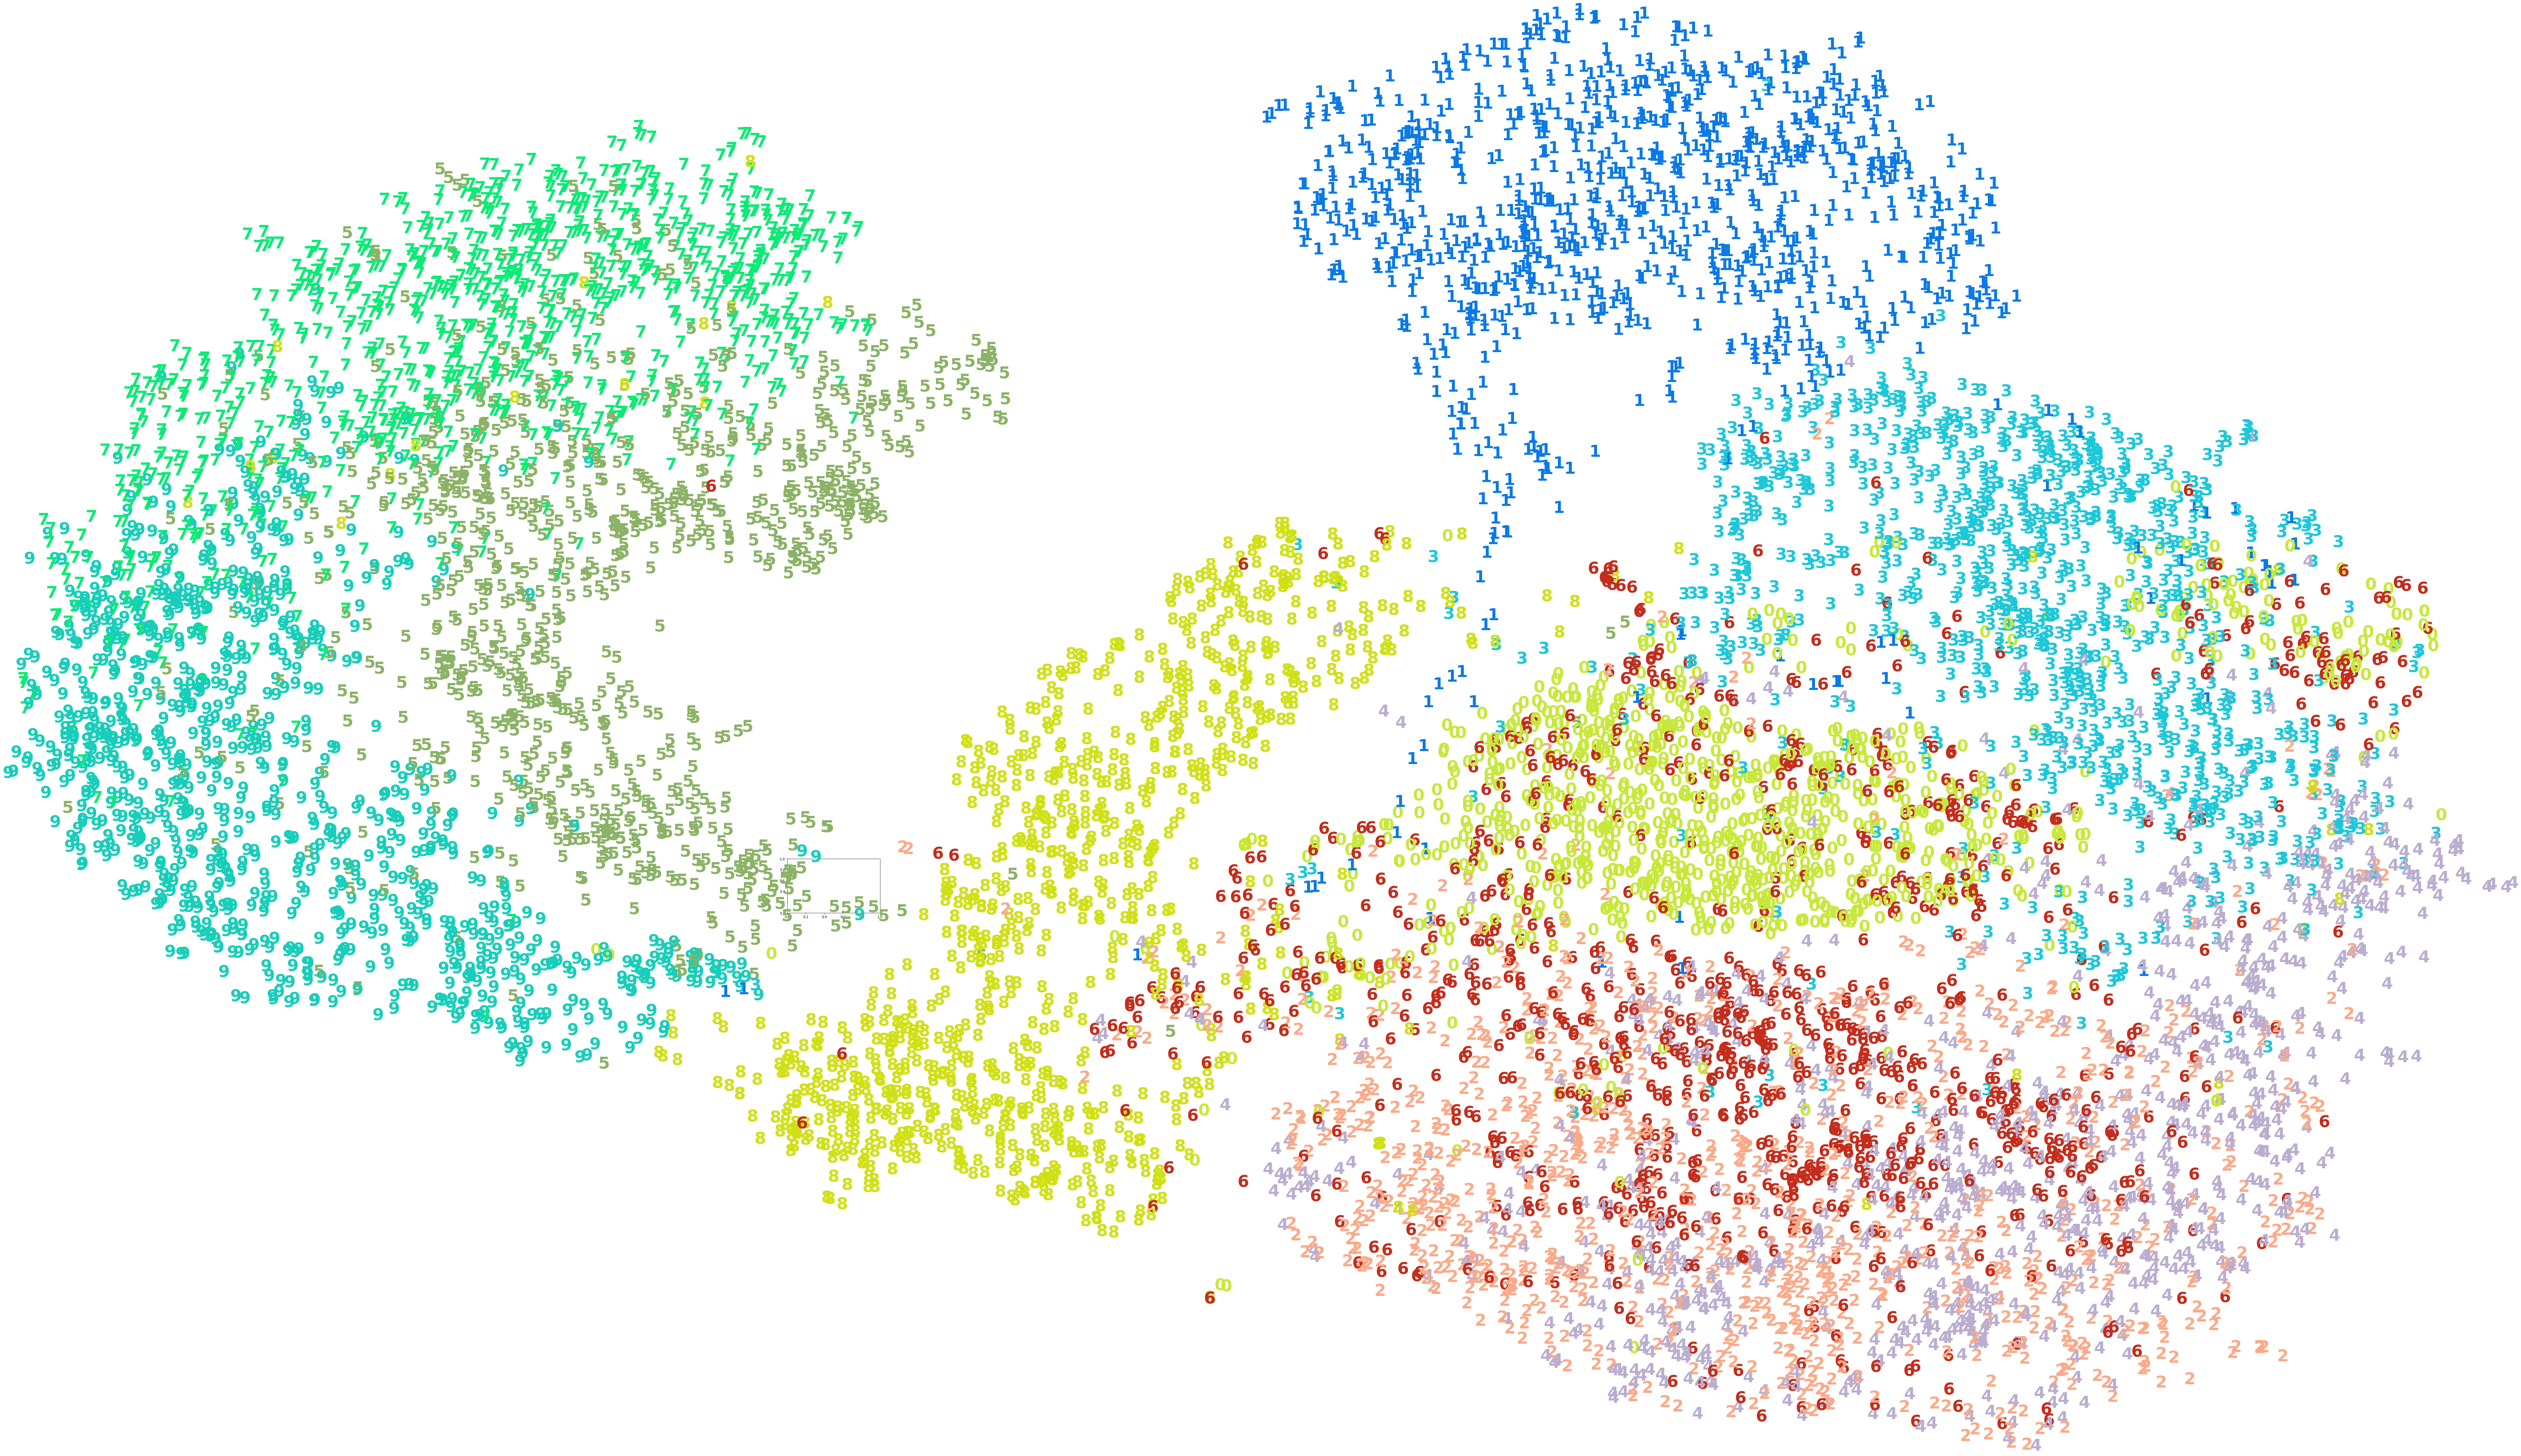

In [41]:
plt.figure(figsize = (5,3))
for i in range(umapdata.shape[0]):
    plt.text(umapdata[i][0], umapdata[i][1], str(y[i]),
    color = c[int(y[i])],
    fontdict={'weight': 'bold', 'size': 50})
    
plt.show()

Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily?

These clusters look a little better separated and grouped compared to TSNE